<a href="https://colab.research.google.com/github/erlonL/testes-inferencia/blob/main/Teste_tstudent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste t-student para comparação de 2 médias populacionais a partir de 2 amostras aleatórias independentes

$$H_0: \mu_1 = \mu_2$$
$$H_1: \mu_1 \neq \mu_2$$


$$ Caso \space 1: \sigma_1^2 \neq \sigma_2^2 $$
$$ Caso \space 2: \sigma_1^2 = \sigma_2^2 $$

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy import stats
from scipy.stats import t as t_student
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [18]:
tabela_t_student = pd.DataFrame(
    [],
    index=[i for i in range(1, 31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column) / 2, index)

index=[('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i / 100), "{0:0.3f}".format((i / 100) / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Unicaudal', 'Bicaudal'], axis=1, inplace = True)

In [47]:
def tstudent_independentes(amostra1, amostra2, alpha):
  X1 = np.mean(amostra1)
  X2 = np.mean(amostra2)
  S1 = np.var(amostra1)
  S2 = np.var(amostra2)
  n1 = len(amostra1)
  n2 = len(amostra2)

  # CASO 1
  if S1 != S2:
    # segue distribuição tstudent ni
    Tcalc = (X1 - X2) / sqrt((((S1)**2)/n1) + (((S2)**2)/n2))

    ni = (((((S1)**2)/n1) + (((S2)**2)/n2))**2) / ((((((S1)**2)/n1)**2) / (n1 - 1)) + (((((S2)**2)/n2)**2) / (n2 - 1)))

    Tc = tabela_t_student[alpha].iloc[(ni)-1][0]

  # CASO 2
  elif S1 == S2:
    Sp = sqrt( ( ((n1 - 1) * (S1**2)) + ((n2 - 1) * (S2**2)) ) / (n1 + n2 - 2) )

    # segue distribuição tstudent n1+n2-2
    Tcalc = (X1 - X2) / Sp * sqrt((1/n1) + (1/n2))

    Tc = tabela_t_student[alpha].iloc[(n1+n2-2)-1][0]

# Teste t-student para comparação de 2 médias populacionais a partir de 2 amostras emparelhadas

$$H_0: \mu_d = 0$$
$$H_1: \mu_d \neq 0$$

In [49]:
def tstudent_emparelhadas(amostra1, amostra2, alpha):
  n = len(amostra1)
  d = []
  for v in range(0,n):
    d.append(amostra2[v] - amostra1[v])

  d_media = sum(d)/n

  mu_d = np.mean(amostra2) - np.mean(amostra1)

  somatorio = 0
  for i in range(0,n):
    somatorio += (d[i] - d_media)**2

  Sd = sqrt((somatorio) / (n - 1))

  # segue distribuição tstudent ni - 1
  Tcalc = (d_media - mu_d) / (Sd/sqrt(n))

  Tc = tabela_t_student[alpha].iloc[(n-1)-1][0]

  # Teste Bicaudal
  if Tcalc > -Tc or Tcalc < Tc:
    print("Não temos evidências para rejeitar H0")
  else:
    print("Temos evidências para rejeitar H0")

  plot = sns.boxplot([amostra1, amostra2], palette='Set2')

  plot.set_ylim(2.8, 4)

Não temos evidências para rejeitar H0


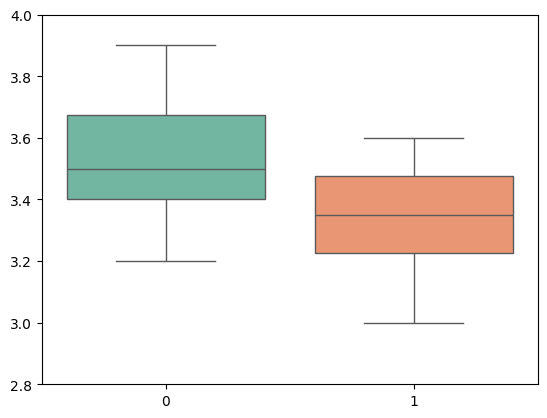

In [50]:
# Exemplo

n = 10
alpha = '0.050'
amostra1 = [3.2, 3.6, 3.4, 3.8, 3.4, 3.5, 3.7, 3.2, 3.5, 3.9]
amostra2 = [3.0, 3.3, 3.5, 3.6, 3.4, 3.3, 3.4, 3.0, 3.2, 3.6]

tstudent_emparelhadas(amostra1, amostra2, alpha)